# Deep learning regularization

This project investigates two regularizaition techniques in neural network: l2 norm regularizaition and drop out.

The moons dataset is used (http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html). The data set consists of two classes of 2-dimensional points (blue and red) that are randomly generated based on two interleaving circles to visualize classification algorithms. The objective is binary classification to separate the two classes.

The deep neural network is stored as separate module (model.py), and layer classes for the model are stored in layers.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from data_utils import plot_decision_boundary, load_moons

%matplotlib inline

## 1. Load data set


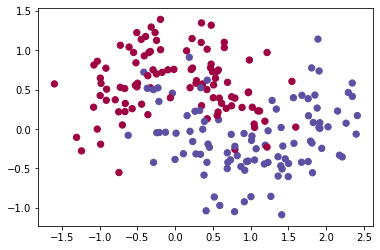

In [2]:
train_X, train_Y = load_moons()

### Logistic regression 


In [3]:
# Class LogisticRegressionCV implements a logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();

# Returns 1-d array of shape (m,) 
C = np.ravel(train_Y)

# Fit the model given the training data
clf.fit(train_X.T, C.T)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

### Predict labels using the logistic regression classifier

In [4]:
# Print accuracy
# clf.predict returns labels for examples (of shape (m,n)) in x of shape (m,)
LR_predictions = clf.predict(train_X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(train_Y,LR_predictions) + np.dot(1-train_Y,1-LR_predictions))/float(train_Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 83 % (percentage of correctly labelled datapoints)


### Plot decision boundary

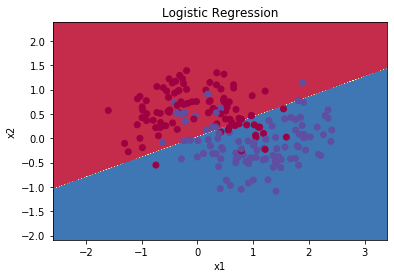

In [5]:
# Plot the decision boundary for logistic regression
plt.title("Logistic Regression")
plot_decision_boundary(lambda x: clf.predict(x), train_X, C)

We can see that logistic regression outputs a linear boundary. Because basically what logistic regression does is take the features (x1 and x2), calculate their weighted sum and use a sigmoid to otuput a score. Thus the boundary is linear w.r.t the features. It underfits the data.

In [251]:
# Print accuracy on a test set generated using the same distribution
test_X, test_Y = load_moons(plot = False)

# clf.predict returns labels for examples (of shape (m,n)) in x of shape (m,)
LR_predictions = clf.predict(test_X.T)
print ('Test ccuracy of logistic regression: %d ' % float((np.dot(test_Y,LR_predictions) + np.dot(1-test_Y,1-LR_predictions))/float(test_Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Test ccuracy of logistic regression: 81 % (percentage of correctly labelled datapoints)


## 2. Unregularized Neural Network

    • Train a 3-layer neural network to classify the data. use 2 hidden layers with 20 and 10 units respectively
    • Use ReLU in the hidden layers and sigmoid in the output layer.
    • Plot the learning curve (cost function vs. number of iterations).
    • Compute the training and test error.
    • Plot the decision boundary, explain if the model is overfitting or underfitting, and justify the observed behavior.


In [7]:
import model

In [243]:
import importlib
importlib.reload(model)
from model import deep_feedforward_network

Cost after iteration 0 : 0.693347
Cost after iteration 100 : 0.249665
Cost after iteration 200 : 0.215744
Cost after iteration 300 : 0.209474
Cost after iteration 400 : 0.205981
Cost after iteration 500 : 0.207714
Cost after iteration 600 : 0.212459
Cost after iteration 700 : 0.193498
Cost after iteration 800 : 0.195083
Cost after iteration 900 : 0.195532


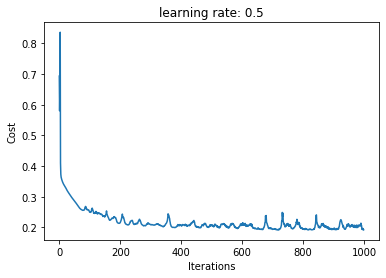

In [254]:
step = 0.5
NN = deep_feedforward_network(train_X, train_Y.flatten(),hidden_list=[20, 10], step_size = step,drop_out=0, l2_reg = 0, max_iter = 1000, verbal = True)
NN.fit()
NN.plot_curve()

In [255]:
NN.evaluate(test_X, test_Y.flatten())

Training accuracy: 0.930   F1 score: 0.930
Testing accuracy: 0.920    F1 score: 0.922


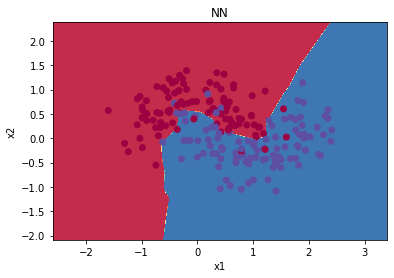

In [256]:
plt.title("NN")
plot_decision_boundary(lambda x: NN.predict(x, sample_as_row = True), train_X, train_Y.flatten())

The unregularized network overfits the data. We can se that there is zig-zag conturs trying to fit the noise. And test accuracy is lower than training data. 

## 3.  Neural Network with L2 Parameter Regularization

    • Implement gradient descent with L2 regularization (vectorized implementation).
    • Train a 3-layer neural network with L2 regularization to classify the data.
    • Use the same 3-layer neural network used in Part 2.

Cost after iteration 0 : 0.704807
Cost after iteration 100 : 0.692409
Cost after iteration 200 : 0.685001
Cost after iteration 300 : 0.434206
Cost after iteration 400 : 0.338172
Cost after iteration 500 : 0.263399
Cost after iteration 600 : 0.235015
Cost after iteration 700 : 0.229654
Cost after iteration 800 : 0.227467
Cost after iteration 900 : 0.226263


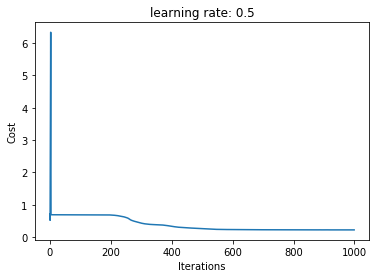

In [261]:
step = 0.5
NN = deep_feedforward_network(train_X, train_Y.flatten(),hidden_list=[20, 10], step_size = step,drop_out=0, l2_reg = 0.1, max_iter = 1000, verbal = True)
NN.fit()
NN.plot_curve()

Training accuracy: 0.915   F1 score: 0.915
Testing accuracy: 0.925    F1 score: 0.926


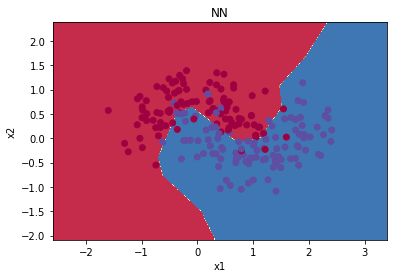

In [262]:
NN.evaluate(test_X, test_Y.flatten())
plt.title("NN")
plot_decision_boundary(lambda x: NN.predict(x, sample_as_row = True), train_X, train_Y.flatten())

Under l2 norm regularization on the size of parameters, the countur is smoother. The testing accuracy is higher than trianing. This indicates that overfitting problem is mitigated. 

###  impact of regularization hyperparameter

In [258]:
for regul in [0.05, 0.1, 1]:
    NN = deep_feedforward_network(train_X, train_Y.flatten(),hidden_list=[20, 10], step_size = step,drop_out=0, l2_reg = regul, max_iter = 1000, verbal = False)
    NN.fit()
    print("L2 regularization hyperparameter: %.2f" %(regul))
    # evaluate
    NN.evaluate(test_X, test_Y.flatten())
    print('---------------')

L2 regularization hyperparameter: 0.05
Training accuracy: 0.910   F1 score: 0.909
Testing accuracy: 0.915    F1 score: 0.916
---------------
L2 regularization hyperparameter: 0.10
Training accuracy: 0.910   F1 score: 0.913
Testing accuracy: 0.925    F1 score: 0.929
---------------
L2 regularization hyperparameter: 1.00
Training accuracy: 0.890   F1 score: 0.882
Testing accuracy: 0.915    F1 score: 0.912
---------------


As ecpected, suitable regularization will aid generalization, and improve the testing performance. While too much regularization will make the model underfit.

## 3.  Neural Network with Dropout

    • Implement gradient descent with dropout (vectorized implementation).
    • Train a 3-layer neural network with L2 regularization to classify the data.
    • Use the same 3-layer neural network used in Part 2.

Cost after iteration 0 : 0.690914
Cost after iteration 100 : 0.476558
Cost after iteration 200 : 0.454239
Cost after iteration 300 : 0.455154
Cost after iteration 400 : 0.448669
Cost after iteration 500 : 0.448694
Cost after iteration 600 : 0.458598
Cost after iteration 700 : 0.429209
Cost after iteration 800 : 0.376147
Cost after iteration 900 : 0.423618


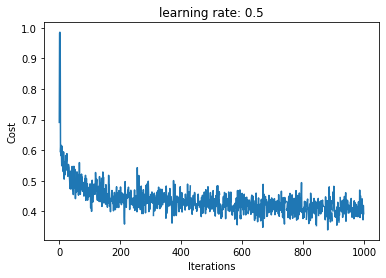

In [305]:
step = 0.5
NN = deep_feedforward_network(train_X, train_Y.flatten(),hidden_list=[20, 10], step_size = step,drop_out=0.5, l2_reg = 0, max_iter = 1000, verbal = True)
NN.fit()
NN.plot_curve()

Training accuracy: 0.855   F1 score: 0.838
Testing accuracy: 0.850    F1 score: 0.833


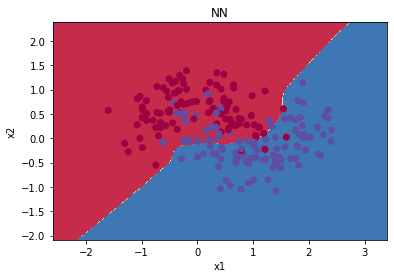

In [306]:
NN.evaluate(test_X, test_Y.flatten())
plt.title("NN")
plot_decision_boundary(lambda x: NN.predict(x, sample_as_row = True), train_X, train_Y.flatten())

The result shows that drop out also smooths the curve, mitigating the overfitting problem. Under 0.5 dropout rate the network is actually underfitting the data. 

The training curve is more chaotic, because each iteration we are droping out ramdon neurons, essentially using differnet network archetechtures.

### impact of the drop out rate hyperparameter

In [307]:
for dropour_p in [0.1, 0.3, 0.5]:
    NN = deep_feedforward_network(train_X, train_Y.flatten(),hidden_list=[20, 10], step_size = step,drop_out=dropour_p, l2_reg = 0, max_iter = 1000, verbal = False)
    NN.fit()
    print("drop out rate: %.1f" %(dropour_p))
    # evaluate
    NN.evaluate(test_X, test_Y.flatten())
    print('---------------')

drop out rate: 0.1
Training accuracy: 0.920   F1 score: 0.921
Testing accuracy: 0.930    F1 score: 0.933
---------------
drop out rate: 0.3
Training accuracy: 0.905   F1 score: 0.907
Testing accuracy: 0.925    F1 score: 0.928
---------------
drop out rate: 0.5
Training accuracy: 0.865   F1 score: 0.866
Testing accuracy: 0.860    F1 score: 0.857
---------------


We can see that morderate drop out rate will help with model generazation. 0.5 dropot rate is already too large and leads to underfitting in this case. A moderate rate (0.1) actually leads to the best performance so far, compared with no or l2 regularizations.

# Conclusion

Overall, the accuracy of the classifiers cannot reach perfect. This is because the noise of original dataset is large, negative and possitive samples are mixed together. Base line linear classifier (logistic regression) can reach 86% accuracy. Nerual network with the right amout of regularization (either l2 regularization or drop out) can beat this by a large margin (over 90%). While too much or too little regularization will result in a poorer classifier. 

During trials, it is also the case that initialization is important -- sometimes the deciding factor. At initial trials, I initialized weights and bias following normal distribution~N(0, 0.01), and it always underfits the data, producing a straight line. Later I adjusted the initialization distrubution to ~N(0.01, 1), i.e., they have a positive mean value and larger variance to break simatry. This results in much better performance. 

The justification for the sensitivity to initialization is the nunlinear activation. We are using reLu activation for hidden units. A possitive value will ensure that not too many neurons are smaller than zero and stop to 'fire' at the very beginning. Since once the neuron is negative, its derivative becomes zero, and stops to learn. 

## Extra: train NN on a circle data

use another dataset to see how NN performs

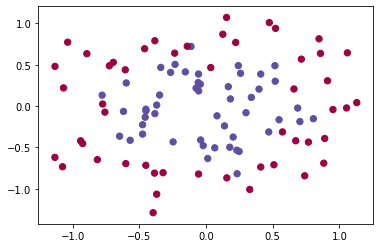

In [308]:
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)
X = X.T

X_test, y_test = make_circles(noise=0.2, factor=0.5, random_state=1)
X_test = X_test.T
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=y, s=40, cmap=plt.cm.Spectral);

Cost after iteration 0 : 0.693498
Cost after iteration 100 : 0.629708
Cost after iteration 200 : 0.421314
Cost after iteration 300 : 0.377995
Cost after iteration 400 : 0.367641
Cost after iteration 500 : 0.274113
Cost after iteration 600 : 0.289759
Cost after iteration 700 : 0.280137
Cost after iteration 800 : 0.280077
Cost after iteration 900 : 0.290467


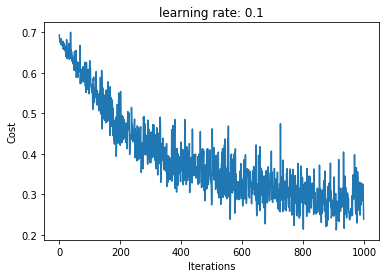

In [310]:
step = 0.1
NN = deep_feedforward_network(X, y,hidden_list=[20, 10], step_size = step,drop_out=0.1, l2_reg = 0, max_iter = 1000, verbal = True)
NN.fit()
NN.plot_curve()

Training accuracy: 0.920   F1 score: 0.920
Testing accuracy: 0.920    F1 score: 0.920


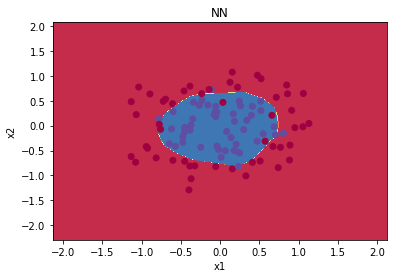

In [311]:

NN.evaluate(X_test, y_test)
plt.title("NN")
plot_decision_boundary(lambda x: NN.predict(x, sample_as_row = True), X, y)